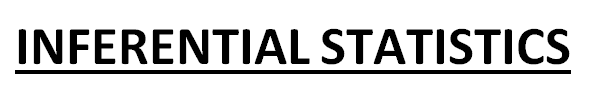

# Z SCORE

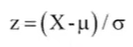

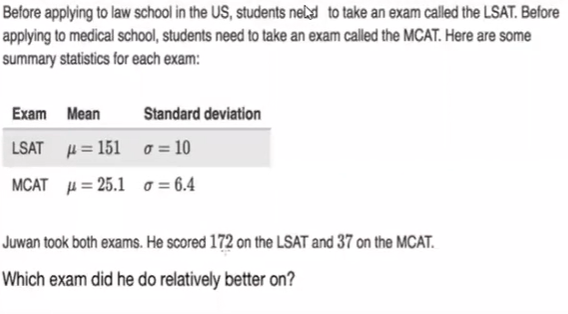

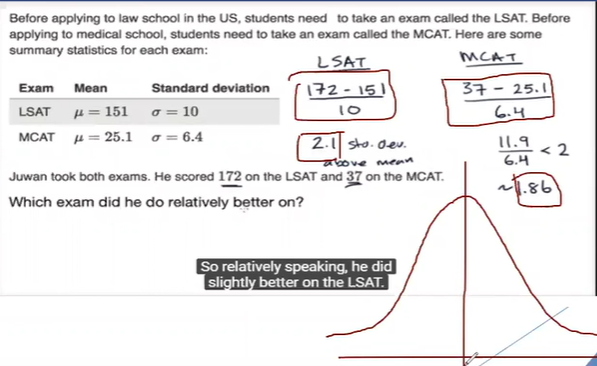

In [1]:
from scipy.stats import zscore
import scipy.stats as stats

In [2]:
zscore([56,34,21,33])  #Here we can tell that 56 is 1.58361516 times standard deviated from the mean.

array([ 1.58361516, -0.15836152, -1.18771137, -0.23754227])

In [3]:
#difference between 56 and the mean is 1.5836 times the standard deviation of the dataset.
#Here we can tell that 56 is 1.58361516 times standard deviated from the mean.
#34 is 0.15836152 times standard deviated below the mean.

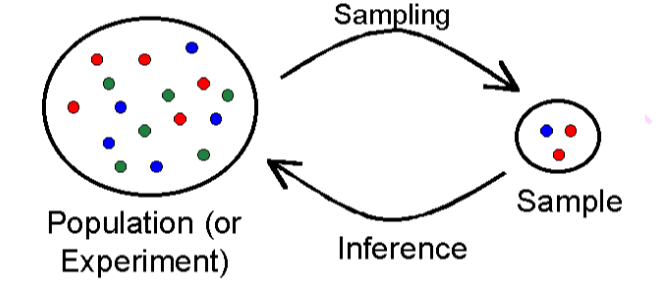

# Central limit theorem

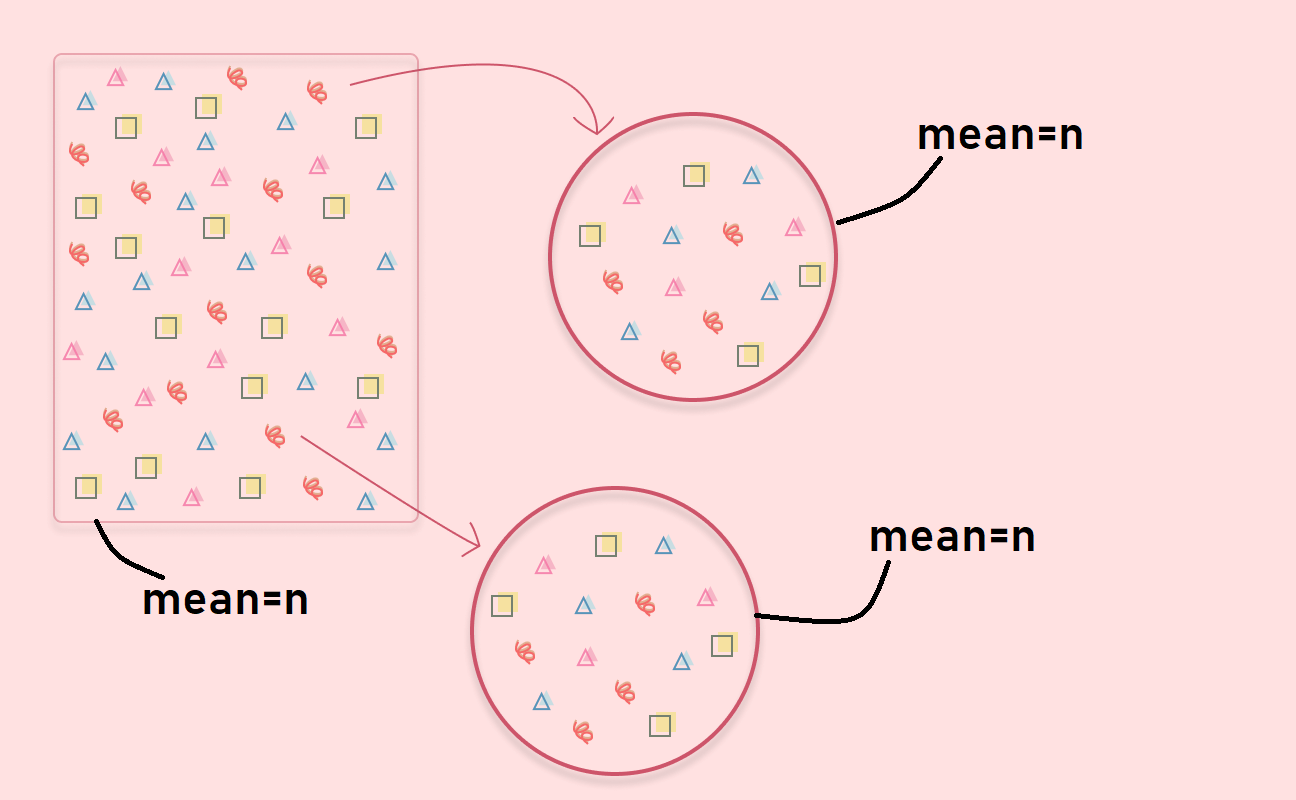

# Proof Of central limit theorem

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('IPL.csv')
df=pd.DataFrame(data=df)

In [6]:
df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [7]:
runs=df.groupby('batsman').sum()['batsman_runs']

In [8]:
runs.shape

(537,)

In [9]:
runs.head(10)

batsman
A Ashish Reddy    280
A Chandila          4
A Chopra           53
A Choudhary        25
A Dananjaya         4
A Flintoff         62
A Kumble           35
A Mishra          362
A Mithun           34
A Mukund           19
Name: batsman_runs, dtype: int64

(array([437.,  36.,  21.,  16.,  10.,   3.,   4.,   3.,   5.,   2.]),
 array([   0. ,  587.8, 1175.6, 1763.4, 2351.2, 2939. , 3526.8, 4114.6,
        4702.4, 5290.2, 5878. ]),
 <BarContainer object of 10 artists>)

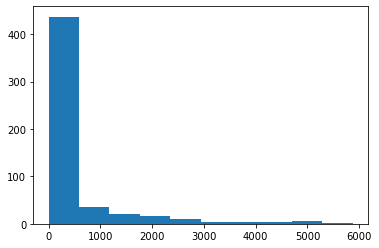

In [10]:
plt.hist(runs)

Here we can see that data is not normally distributed, infact it is negative exponential distribution

<AxesSubplot:xlabel='batsman_runs', ylabel='Density'>

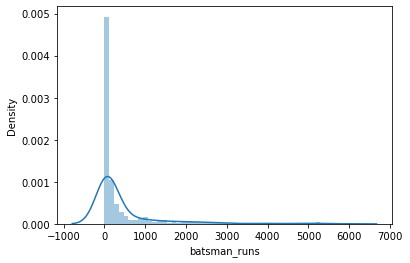

In [11]:
sns.distplot(runs)

In [12]:
np.random.choice(runs,size=10)

array([5368,   81,    2, 1379,   12,    0,  153,  196,   66,    3],
      dtype=int64)

In [13]:
m=1000 #number of samples
n=50   #sample size
sample_avj=[]

for i in range(m):
    a=np.random.choice(runs,size=n)   #This creates an array
    sample_avj.append(a.mean())
        

In [14]:
len(sample_avj)

1000

In [15]:
sample_avj

[349.42,
 471.54,
 395.36,
 209.16,
 492.26,
 553.78,
 412.58,
 594.08,
 295.14,
 543.12,
 462.8,
 497.22,
 214.28,
 440.66,
 352.46,
 643.02,
 475.1,
 466.8,
 284.74,
 337.08,
 751.52,
 629.24,
 447.12,
 588.34,
 520.36,
 356.34,
 386.44,
 373.42,
 358.94,
 260.1,
 313.36,
 365.42,
 374.24,
 273.58,
 396.78,
 435.98,
 594.16,
 212.92,
 398.86,
 476.48,
 190.62,
 196.54,
 332.42,
 352.42,
 432.1,
 433.9,
 372.42,
 492.98,
 348.56,
 379.46,
 347.12,
 484.02,
 331.84,
 323.42,
 419.48,
 525.44,
 375.84,
 550.06,
 430.92,
 357.68,
 457.08,
 361.04,
 530.06,
 529.96,
 517.36,
 167.76,
 333.52,
 601.26,
 429.28,
 275.88,
 257.04,
 355.94,
 212.28,
 248.08,
 724.02,
 443.2,
 610.02,
 307.96,
 559.98,
 442.1,
 183.72,
 614.18,
 542.86,
 314.48,
 475.1,
 321.96,
 389.62,
 298.82,
 423.92,
 317.74,
 385.14,
 430.34,
 525.18,
 547.12,
 510.16,
 234.32,
 467.14,
 321.22,
 354.96,
 526.86,
 351.1,
 406.78,
 494.98,
 453.58,
 402.88,
 686.94,
 345.76,
 444.7,
 470.4,
 271.42,
 372.94,
 341.74,
 427

In [16]:
sample_avj=np.array(sample_avj)   #converting the list into an array and storing in the same variable.

In [17]:
sample_avj

array([349.42, 471.54, 395.36, 209.16, 492.26, 553.78, 412.58, 594.08,
       295.14, 543.12, 462.8 , 497.22, 214.28, 440.66, 352.46, 643.02,
       475.1 , 466.8 , 284.74, 337.08, 751.52, 629.24, 447.12, 588.34,
       520.36, 356.34, 386.44, 373.42, 358.94, 260.1 , 313.36, 365.42,
       374.24, 273.58, 396.78, 435.98, 594.16, 212.92, 398.86, 476.48,
       190.62, 196.54, 332.42, 352.42, 432.1 , 433.9 , 372.42, 492.98,
       348.56, 379.46, 347.12, 484.02, 331.84, 323.42, 419.48, 525.44,
       375.84, 550.06, 430.92, 357.68, 457.08, 361.04, 530.06, 529.96,
       517.36, 167.76, 333.52, 601.26, 429.28, 275.88, 257.04, 355.94,
       212.28, 248.08, 724.02, 443.2 , 610.02, 307.96, 559.98, 442.1 ,
       183.72, 614.18, 542.86, 314.48, 475.1 , 321.96, 389.62, 298.82,
       423.92, 317.74, 385.14, 430.34, 525.18, 547.12, 510.16, 234.32,
       467.14, 321.22, 354.96, 526.86, 351.1 , 406.78, 494.98, 453.58,
       402.88, 686.94, 345.76, 444.7 , 470.4 , 271.42, 372.94, 341.74,
      

<AxesSubplot:ylabel='Density'>

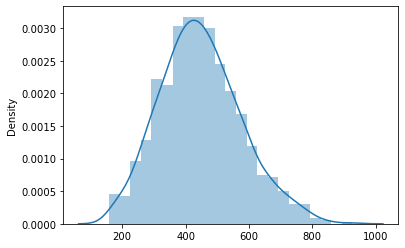

In [18]:
sns.distplot(sample_avj)

Previously this was negative exponential distribution but after applying CLT, it turned into normal distribution.

In [19]:
runs.mean()

446.8249534450652

In [20]:
sample_avj.mean()  #This is the mean of the sample means.

447.32094

We observe that the mean of the population and  the mean of sample means are almost equal.

In [21]:
runs.var()/50

17140.586699463583

In [22]:
sample_avj.var()

16467.6064683164

# Hypothesis testing

# T-TEST(Part of hypothesis test)

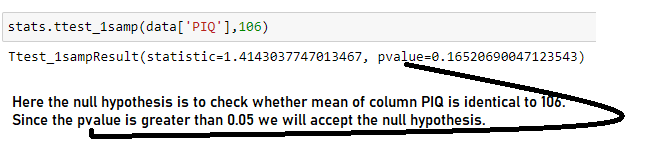

In [23]:
import pandas as pd

In [24]:
data=pd.read_csv('brain_size.csv',sep=';',na_values=".")
data
#comma separator is not present in the file, so sep=';' is given.
#na_values="." is given because the missing value are represent by '.' in the original table

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [25]:
# 1 sample TTest
stats.ttest_1samp(data['PIQ'],106)

Ttest_1sampResult(statistic=1.4143037747013467, pvalue=0.16520690047123543)

Since Pvalue is greater than 0.05, the null hypothesis is accepted

In [26]:
stats.ttest_1samp(data['FSIQ'],108)

Ttest_1sampResult(statistic=1.4313065596727563, pvalue=0.1603075926135647)

In [27]:
data['FSIQ'].mean()

113.45

In [28]:
# 2 Sample TTest
stats.ttest_ind(data['FSIQ'],data['PIQ']) 

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [29]:
df=pd.read_csv('student_marks.csv')
df

,Unnamed: 0,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


# Corelation test(Part of hypothesis test)

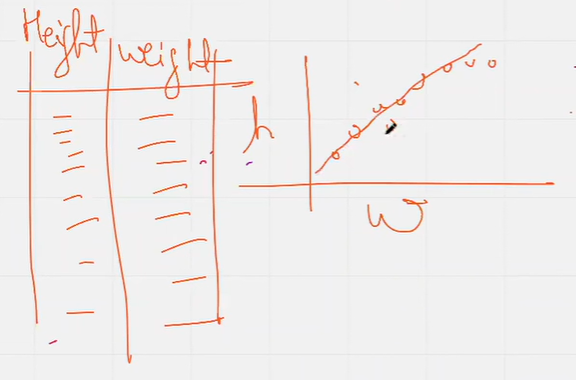

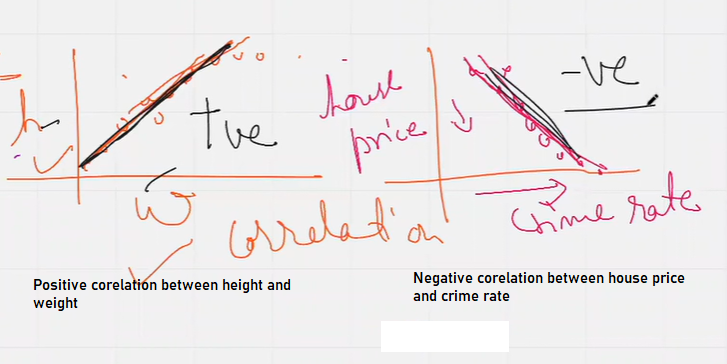

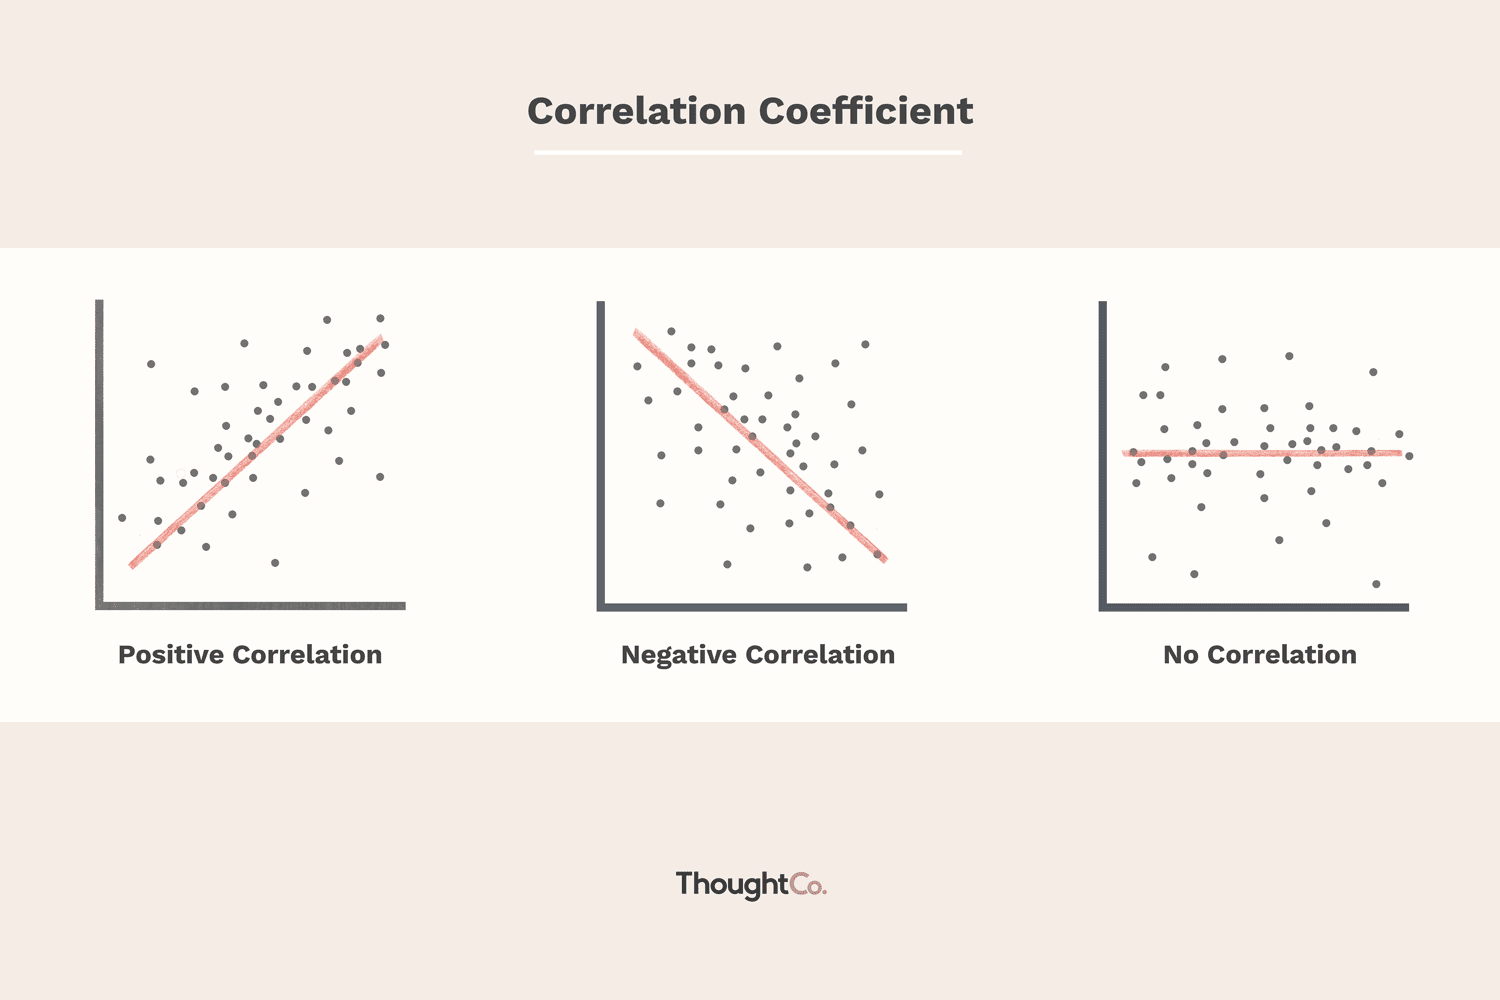

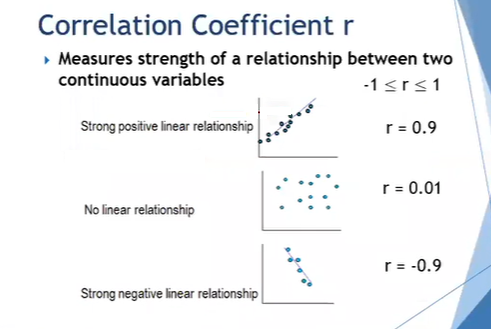

Measure of relationship

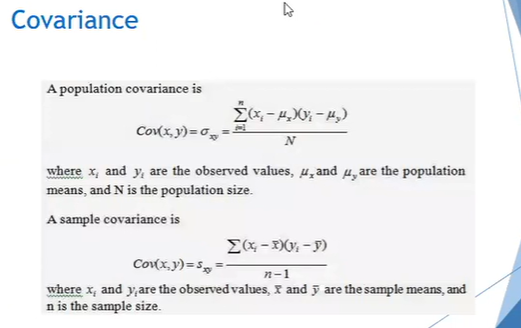

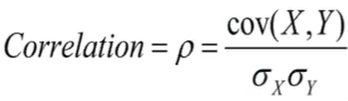

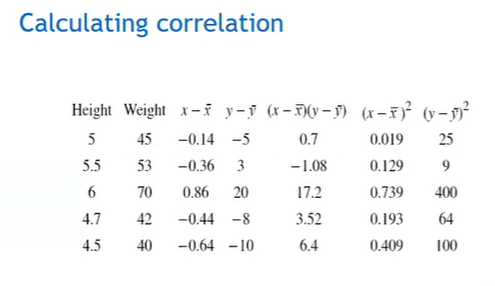

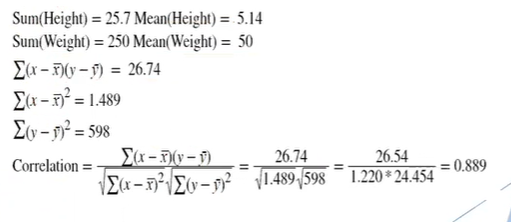

In [30]:
dfc=df.corr() #gives the corelation of different columns with each other.
dfc

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


<AxesSubplot:>

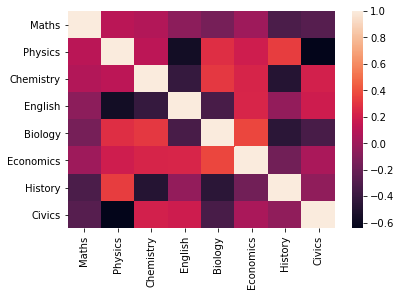

In [31]:
import seaborn as sns
sns.heatmap(dfc) #putting the corelation data in heatmap.

# Confusion matrix

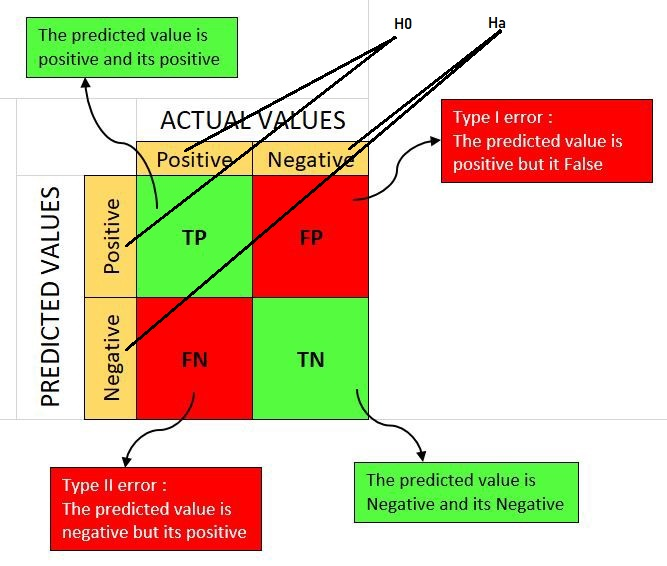

# Categorical variable test of independence- Chi square test

In [32]:
import numpy as np
import pandas as pd
import scipy.stats as stats
ds=pd.read_csv("role_website.csv")
ds

,role,website
0,teacher,linkedin
1,teacher,linkedin
2,student,facebook
3,student,facebook
4,teacher,linkedin
5,student,facebook
6,student,facebook
7,teacher,linkedin
8,teacher,linkedin
9,teacher,facebook


In [33]:
ds.describe()

,role,website
count,34,34
unique,2,2
top,teacher,linkedin
freq,21,18


In [34]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   role     34 non-null     object
 1   website  34 non-null     object
dtypes: object(2)
memory usage: 672.0+ bytes


In [35]:
ds.dtypes

role       object
website    object
dtype: object

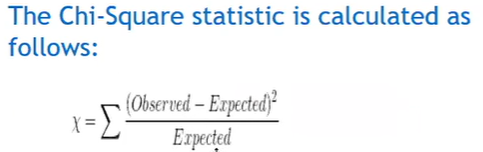

In [36]:
#Create contingency table
df_crosstab=pd.crosstab(ds['role'],ds['website'],margins=True)
print(df_crosstab)

website  facebook  linkedin  All
role                            
student        10         3   13
teacher         6        15   21
All            16        18   34


In [37]:
df_crosstab.columns=['facebook','linkedin','row_totals'] #giving column names to the contingency table.
df_crosstab.index=['student','teacher','col_totals']     #giving row names to the contingency table.
df_crosstab

,facebook,linkedin,row_totals
student,10,3,13
teacher,6,15,21
col_totals,16,18,34


In [38]:
#Get the observed table to put it into chisquare test.
observed=df_crosstab.iloc[0:2,0:2]
observed

,facebook,linkedin
student,10,3
teacher,6,15


In [39]:
stats.chi2_contingency(observed=observed)

(5.718991656491658,
 0.01678236577734386,
 1,
 array([[ 6.11764706,  6.88235294],
        [ 9.88235294, 11.11764706]]))

In [40]:
#doing the chi square test on the contingency table to find out the p-value and storing the obtained results in multiple variables.
chi2,p,dof,expected=stats.chi2_contingency(observed=observed) 

In [41]:
print('Chi square=',chi2)
print('Pvalue=',p)
print('dof=',dof)
print('expected=',expected)

Chi square= 5.718991656491658
Pvalue= 0.01678236577734386
dof= 1
expected= [[ 6.11764706  6.88235294]
 [ 9.88235294 11.11764706]]


# ANOVA TEST(F test)(Fisherman test)


ANOVA- Analysis of variance

In [42]:
#Lets find the analysis of variances(ANOVA) among marks conducted for Maths test in three sections.
#The below is given marks list of 3 sections

from scipy.stats import f_oneway

Marks_sectionA=[70,40,60,78,90]
Marks_sectionB=[95,55,70,80,72]
Marks_sectionC=[70,30,86,59,95]

f_oneway(Marks_sectionA,Marks_sectionB,Marks_sectionC)

F_onewayResult(statistic=0.1792220580994584, pvalue=0.8381170734177052)

In [43]:
#Interpreting the result---> As pvalue is greater than 0.05, hence all group means are equal. ie: null hypothesis is accepted. 